# Graphs

## Requirements

In [1]:
!pip install seaborn pandas pandas-profiling[notebook]

In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

## Data

In [40]:
df = pd.read_csv("./dataset/out/summary.csv")
df[df["ner"]=="nametag"]["features"].describe()

count     99.000000
mean      77.585859
std      135.363005
min        0.000000
25%       13.000000
50%       30.000000
75%       84.000000
max      994.000000
Name: features, dtype: float64

In [42]:
df.drop(columns=["test-name", "features"]).groupby("ner").describe().T

ner                nametag        nltk       spacy
exact   count    99.000000   99.000000   99.000000
        mean     37.181818   29.656566   27.343434
        std      71.824810   56.807078   40.385177
        min       0.000000    0.000000    0.000000
        25%       8.000000    5.000000    4.000000
        50%      14.000000   11.000000   10.000000
        75%      36.000000   34.500000   32.000000
        max     592.000000  481.000000  220.000000
inside  count    99.000000   99.000000   99.000000
        mean     11.464646    1.888889    4.959596
        std      52.559454    3.401347   10.611814
        min       0.000000    0.000000    0.000000
        25%       0.000000    0.000000    0.000000
        50%       1.000000    1.000000    2.000000
        75%       3.000000    2.000000    5.000000
        max     417.000000   19.000000   79.000000
partial count    99.000000   99.000000   99.000000
        mean      1.050505    0.747475    1.101010
        std       1.716509    1.493820    1.656742
        min       0.000000    0.000000    0.000000
        25%       0.000000    0.000000    0.000000
        50%       0.000000    0.000000    1.000000
        75%       1.000000    1.000000    1.000000
        max      10.000000    9.000000    8.000000
lines   count    99.000000   99.000000   99.000000
        mean    102.525253   44.363636   92.010101
        std     209.003044   88.499216  118.893409
        min       0.000000    0.000000    0.000000
        25%      14.000000    8.000000   14.500000
        50%      29.000000   19.000000   36.000000
        75%     111.000000   53.000000  134.000000
        max    1576.000000  772.000000  570.000000

In [5]:
min_feat = 20
df[df["features"] > min_feat].describe()

,features,exact,inside,partial,lines
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,114.562500,45.895833,8.973958,1.395833,117.932292
std,155.895442,67.545832,38.493004,1.858779,174.605196
min,21.000000,2.000000,0.000000,0.000000,6.000000
25%,31.750000,12.000000,1.000000,0.000000,28.000000
50%,48.500000,24.000000,2.000000,1.000000,54.500000
75%,133.250000,57.250000,5.000000,2.000000,157.500000
max,994.000000,592.000000,417.000000,10.000000,1576.000000


## Profile

In [43]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Recall
$$ \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total actual positive}} $$


In [7]:
# Any match
df['recall'] = (df['exact'] + df['inside'] + df['partial']) / df['features']
# Exact match
df['recall-exact'] = df['exact'] / df['features']

In [8]:
df[["recall", "recall-exact", "ner"]].groupby("ner").describe()

recall                                                              \
         count      mean       std       min       25%       50%       75%   
ner                                                                          
nametag   96.0  0.659056  0.187636  0.263158  0.524124  0.646110  0.808187   
nltk      96.0  0.508774  0.213912  0.026895  0.376179  0.529683  0.670455   
spacy     96.0  0.510146  0.197527  0.000000  0.376521  0.520916  0.641329   

             recall-exact                                                    \
         max        count      mean       std       min       25%       50%   
ner                                                                           
nametag  1.0         96.0  0.560625  0.187946  0.152964  0.416667  0.558761   
nltk     1.0         96.0  0.452839  0.208268  0.000000  0.333333  0.473389   
spacy    1.0         96.0  0.396381  0.199713  0.000000  0.245192  0.404082   

                        
              75%  max  
ner                     
nametag  0.700000  1.0  
nltk     0.571429  1.0  
spacy    0.528358  1.0

Text(0.5, 1.0, 'Recall (exact match)')

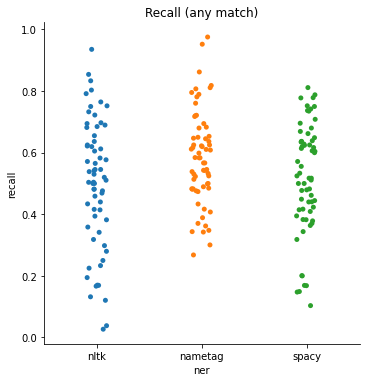

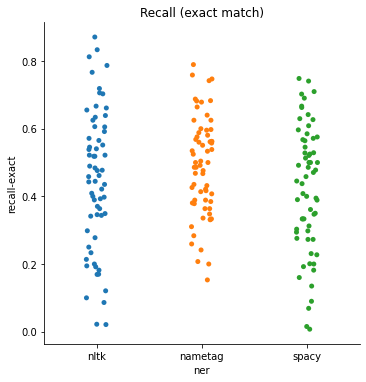

In [9]:
sns.catplot(data=df[df["features"] > min_feat], y="recall", x="ner")
plt.title('Recall (any match)')
sns.catplot(data=df[df["features"] > min_feat], y="recall-exact", x="ner")
plt.title('Recall (exact match)')

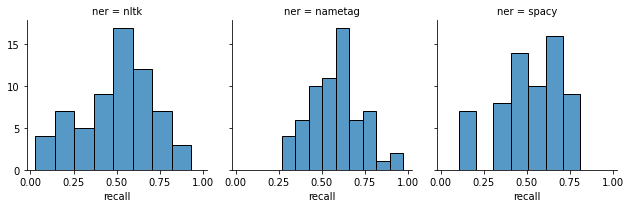

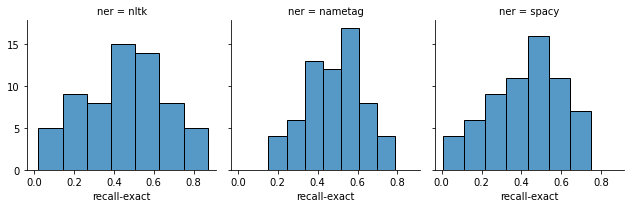

In [10]:
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall")
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall-exact")

<AxesSubplot:title={'center':'Recall (weighted)'}, xlabel='ner', ylabel='recall'>

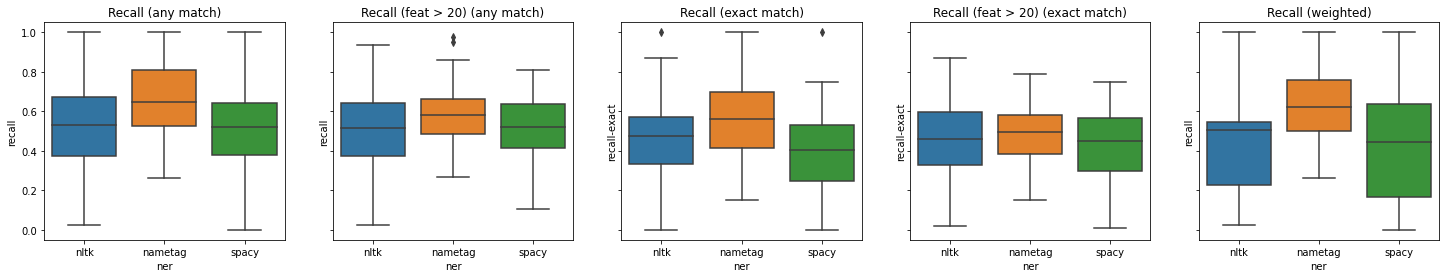

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=(25,4), sharey=True)
axs[0].set_title('Recall (any match)')
sns.boxplot(data=df, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Recall (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall", ax=axs[1])
axs[2].set_title('Recall (exact match)')
sns.boxplot(data=df, x="ner", y="recall-exact", ax=axs[2])
axs[3].set_title(f"Recall (feat > {min_feat}) (exact match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall-exact", ax=axs[3])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[4].set_title(f"Recall (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="recall", ax=axs[4])

### Full data

<AxesSubplot:xlabel='recall', ylabel='Count'>

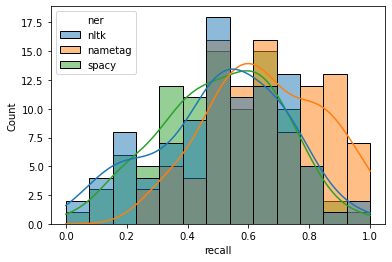

In [12]:
sns.histplot(kde=True, data=df, x="recall", hue="ner")

### Filtered data

<AxesSubplot:xlabel='recall', ylabel='Count'>

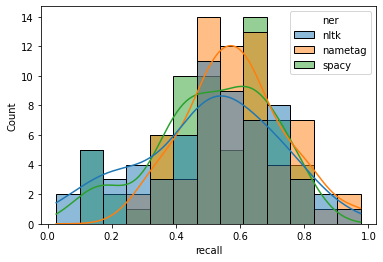

In [13]:
sns.histplot(kde=True, data=df[df["features"] > min_feat], x="recall", hue="ner")

## Precision

$$ \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total predicted posititive}} $$


In [14]:
df['prec'] = (df['exact'] + df['inside'] + df['partial']) / df['lines']

In [15]:
df.describe()

,features,exact,inside,partial,lines,recall,recall-exact,prec
count,297.000000,297.000000,297.000000,297.000000,297.000000,288.000000,288.000000,288.000000
mean,77.585859,31.393939,6.104377,0.966330,79.632997,0.559325,0.469948,0.596469
std,134.904922,57.741470,31.172350,1.627117,149.592905,0.211439,0.209550,0.243479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,0.000000,0.000000,11.000000,0.427198,0.333333,0.398684
50%,30.000000,12.000000,1.000000,0.000000,27.000000,0.566667,0.487639,0.600000
75%,85.000000,35.000000,3.000000,1.000000,86.000000,0.697887,0.598113,0.785714
max,994.000000,592.000000,417.000000,10.000000,1576.000000,1.000000,1.000000,1.200000


<AxesSubplot:title={'center':'Precision (weighted)'}, xlabel='ner', ylabel='prec'>

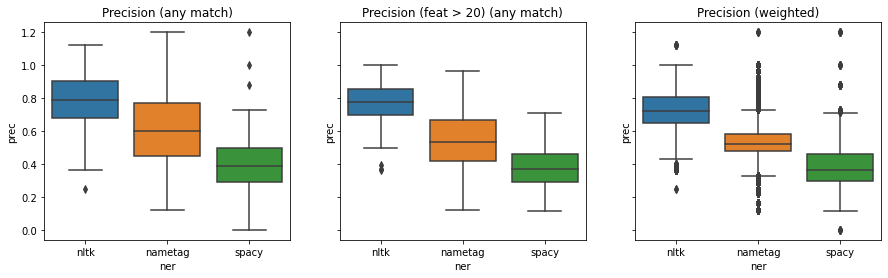

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Precision (any match)')
sns.boxplot(data=df, x="ner", y="prec", ax=axs[0])
axs[1].set_title(f"Precision (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="prec", ax=axs[1])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[2].set_title(f"Precision (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="prec", ax=axs[2])

## Summary


In [17]:
summary = df.groupby("ner", as_index=False).sum()
summary["recall"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["features"]
summary["prec"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["lines"]
summary["f1"] = 2 * (summary["prec"] * summary["recall"]) / (summary["prec"] + summary["recall"])
summary

,ner,features,exact,inside,partial,lines,recall,recall-exact,prec,f1
0,nametag,7681,3681,1135,104,10150,0.640542,53.819988,0.484729,0.551848
1,nltk,7681,2936,187,74,4392,0.416222,43.472580,0.727914,0.529612
2,spacy,7681,2707,491,109,9109,0.430543,38.052579,0.363048,0.393925


<AxesSubplot:title={'center':'f1'}, xlabel='ner', ylabel='f1'>

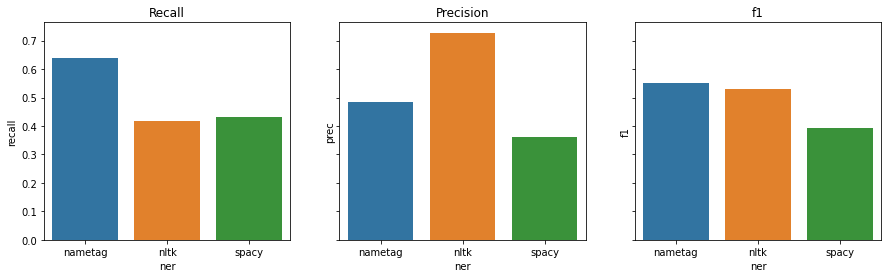

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Recall')
sns.barplot(data=summary, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Precision")
sns.barplot(data=summary, x="ner", y="prec", ax=axs[1])
axs[2].set_title('f1')
sns.barplot(data=summary, x="ner", y="f1", ax=axs[2])

### Tokenization

In [37]:
summary["missing"] = summary["features"] - (summary["exact"] + summary["inside"] + summary["partial"])
summary[["ner", "exact", "inside", "partial", "missing"]]

,ner,exact,inside,partial,missing
0,nametag,3681,1135,104,2761
1,nltk,2936,187,74,4484
2,spacy,2707,491,109,4374


array([<AxesSubplot:ylabel='nametag'>, <AxesSubplot:ylabel='nltk'>,
       <AxesSubplot:ylabel='spacy'>], dtype=object)

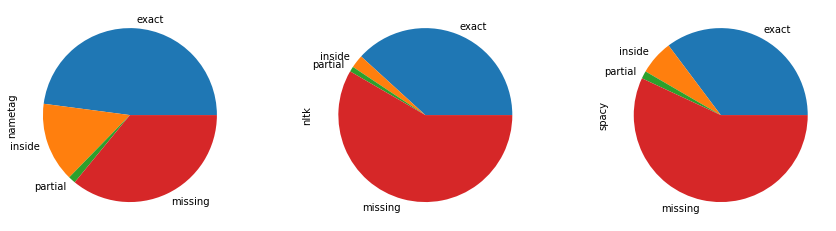

In [35]:
rows = summary.shape[0]
summary.set_index("ner")[["exact", "inside", "partial", "missing"]].T.plot.pie(subplots=True, figsize=[5*rows,4], legend=False)